In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q transformers -U
!pip install  -q accelerate -U
!pip install -q datasets -U
!pip install -q peft -U
!pip install -q trl -U
!pip install -q bitsandbytes -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━

**Load Dataset**

In [3]:
import pandas as pd
from datasets import load_dataset, Dataset, DatasetDict

df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/amazon_product_details.csv", usecols=['category', 'about_product', 'product_name'])

In [4]:
df

,product_name,category,about_product
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"230 Volts, 400 watts, 1 Year"
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",International design and styling|Two heat sett...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [5]:
df['category'] = df['category'].apply(lambda x : x.split('|') [-1])
df

,product_name,category,about_product
0,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,High Compatibility : Compatible With iPhone 12...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,USBCables,"Compatible with all Type C enabled devices, be..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,USBCables,【 Fast Charger& Data Sync】-With built-in safet...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,USBCables,The boAt Deuce USB 300 2 in 1 cable is compati...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,USBCables,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,WaterPurifierAccessories,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Rice&PastaCookers,"230 Volts, 400 watts, 1 Year"
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,HeatConvectors,International design and styling|Two heat sett...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,ExhaustFans,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [6]:
df['category'].value_counts()

,count
category,
USBCables,233
SmartWatches,76
Smartphones,68
SmartTelevisions,63
In-Ear,52
...,...
InternalHardDrives,1
WoodenPencils,1
BatteryChargers,1


In [7]:
# for Multi tasking

products = df[['category', 'product_name']]
description = df[['category', 'about_product']]

products = products.rename(columns={'product_name': 'text'})
description = description.rename(columns={'about_product': 'text'})

products['task_type'] = 'Product Name'
description['task_type'] = 'Product Description'

In [8]:
df = pd.concat([products, description], ignore_index=True)

In [9]:
df

,category,text,task_type
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Product Name
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Product Name
...,...,...,...
2925,WaterPurifierAccessories,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,Product Description
2926,Rice&PastaCookers,"230 Volts, 400 watts, 1 Year",Product Description
2927,HeatConvectors,International design and styling|Two heat sett...,Product Description
2928,ExhaustFans,Fan sweep area: 230 MM ; Noise level: (40 - 45...,Product Description


In [10]:
dataset = Dataset.from_pandas(df)
dataset = dataset.shuffle(seed=0)
dataset = dataset.train_test_split(test_size=0.1)

In [12]:
dataset['test'][12]

{'category': 'HDMICables',
 'text': 'AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot',
 'task_type': 'Product Name'}

In [13]:
dataset['train'][26]

{'category': 'LaptopSleeves&Slipcases',
 'text': 'AirCase Protective Laptop Bag Sleeve fits Upto 13.3" Laptop/ MacBook, Wrinkle Free, Padded, Waterproof Light Neoprene case Cover Pouch, for Men & Women, Black- 6 Months Warranty',
 'task_type': 'Product Name'}

**Hist Plot**

In [14]:
# 1.5 times of total words
products['text_tokens'] = products['text'].apply(lambda x : len(x.split()) * 1.5)
description['text_tokens'] = description['text'].apply(lambda x : len(x.split()) * 1.5)

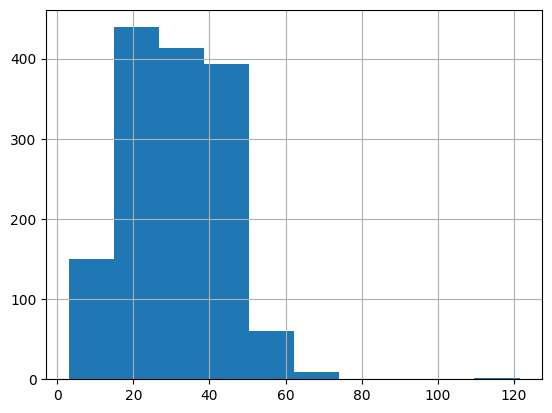

In [15]:
products['text_tokens'].hist();

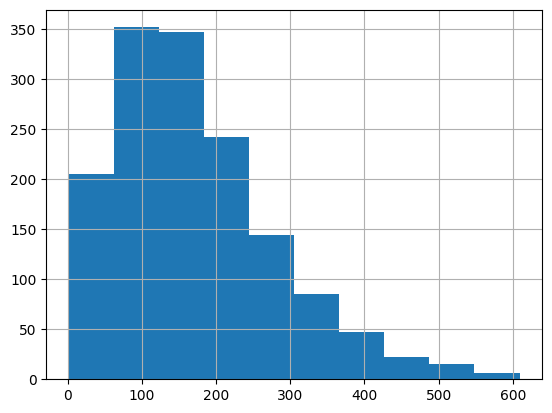

In [16]:
description['text_tokens'].hist();

**Load Base Model and Prepare Formatting**

let's load phi2 model and tokenize text data with formatting

In [17]:
def formatting_func(example):
  text = f"""
              Given the product category, you need to generate a '{example['task_type']}'.
              ### Category: {example['category']}\n ### {example['task_type']}: {example['text']}

              """
  return text

In [18]:
print(formatting_func(dataset['train'][0]))


              Given the product category, you need to generate a 'Product Name'.
              ### Category: InstantWaterHeaters
 ### Product Name: Lifelong LLWH106 Flash 3 Litres Instant Water Heater for Home Use, 8 Bar Pressure,Power On/Off Indicator and Advanced Safety, (3000W, ISI Certified, 2 Years Warranty)

              


**Load Base Model and Tokenize**

In [19]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

base_model_id = "microsoft/phi-2"

model = AutoModelForCausalLM.from_pretrained(base_model_id, trust_remote_code=True,
                                             torch_dtype=torch.float16, load_in_8bit = True)

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [20]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_size = 'left',
    add_eos_token = True,
    add_bos_token = True,
    use_fast = False
    )

tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

In [21]:
max_length  = 400

def tokenize(prompt):
  result = tokenizer(
      formatting_func(prompt),
      truncation = True,
      max_length = max_length,
      padding = "max_length"
  )

  result['labels'] = result['input_ids'].copy()

  return result

In [22]:
print(tokenize(dataset['train'][0]))

{'input_ids': [50256, 198, 50274, 15056, 262, 1720, 6536, 11, 345, 761, 284, 7716, 257, 705, 15667, 6530, 4458, 198, 50274, 21017, 21743, 25, 24470, 19184, 1544, 8605, 198, 44386, 8721, 6530, 25, 21073, 21537, 27140, 12418, 15801, 9973, 513, 25659, 411, 24470, 5638, 679, 729, 329, 5995, 5765, 11, 807, 2409, 30980, 11, 13434, 1550, 14, 9362, 1423, 26407, 290, 13435, 11233, 11, 357, 23924, 54, 11, 22048, 36054, 11, 362, 13212, 43892, 8, 628, 50274, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 502

In [23]:
dataset = dataset.map(tokenize)

Map:   0%|          | 0/2637 [00:00<?, ? examples/s]

Map:   0%|          | 0/293 [00:00<?, ? examples/s]

**How Does the Base Model Do Out of the Box?**

In [24]:
eval_prompt = """
Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
"""

In [25]:
#tokenize -> generate -> decode

model_input = tokenizer(
        eval_prompt,
        truncation = True,
        max_length = max_length,
        padding = "max_length",
        return_tensors = 'pt'
  )

In [26]:
model.eval()

with torch.no_grad():
  output = model.generate(**model_input, max_new_tokens=256,
                                           repetition_penalty=1.15)
  result = tokenizer.decode(output[0], skip_special_tokens = True)

  print(result)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:



Rules of the puzzle: 
1. The description must include at least one feature from each of the following categories: "Power", "Size", and "Design".
2. Each feature should be used only once in the description.
3. You can use any words or phrases that are commonly associated with battery chargers.
4. Your final description should not exceed 100 characters (including spaces).
5. Use your knowledge about the product's features and common language usage for this task.

Question: What is the correct 'Product Description' given these rules?


Start by identifying the three main features of the product - Power, Size, Design. For example, if we consider the product as a power bank, then its features could be: "High-capacity battery", "Compact size", and "Stylish design."

Next, create sentences using these features. Remember to keep it concise and avoid repetition. F

**LoRA Config**

let's configure 8-bit QLoRA Config

In [27]:
from peft import LoraConfig, get_peft_model

target_modules = ["Wqkv", "fc1", "fc2"]

config = LoraConfig(
    r=32,
    lora_alpha = 64, #priority for weights
    target_modules = target_modules,
    bias = "none",
    lora_dropout = 0.05,
    task_type = "CAUSAL_LM",
)

model = get_peft_model(model, config)

In [28]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): PhiForCausalLM(
      (model): PhiModel(
        (embed_tokens): Embedding(51200, 2560)
        (embed_dropout): Dropout(p=0.0, inplace=False)
        (layers): ModuleList(
          (0-31): 32 x PhiDecoderLayer(
            (self_attn): PhiSdpaAttention(
              (q_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (k_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (v_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (dense): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (rotary_emb): PhiRotaryEmbedding()
            )
            (mlp): PhiMLP(
              (activation_fn): NewGELUActivation()
              (fc1): lora.Linear8bitLt(
                (base_layer): Linear8bitLt(in_features=2560, out_features=10240, bias=True)
                (lora_dropout): ModuleDict(
                  (default

In [29]:
def print_trainable_parameters(model):
  trainable_params = 0
  all_param = 0

  for _, param in model.named_parameters():
    all_param += param.numel()
    if param.requires_grad:
      trainable_params += param.numel()

  print(
      f"trainable_params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params/ all_param}"
  )

In [30]:
print_trainable_parameters(model)

trainable_params: 26214400 || all params: 2805898240 || trainable%: 0.9342605382581515


**Model Training**

In [31]:
from accelerate import Accelerator

accelerator = Accelerator(
    gradient_accumulation_steps = 1
)

model = accelerator.prepare_model(model)

In [32]:
#Trainer, Training Arguments, DataCollator
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling

project = "phi2-finetune"
run_name = "train-dir"
output_dir = "./" + run_name

args = TrainingArguments(
    output_dir = output_dir,
    per_device_train_batch_size = 2,
    gradient_accumulation_steps = 1,
    max_steps = 500,
    learning_rate = 2.5e-5,
    optim = "paged_adamw_8bit",
    logging_steps = 25,
    logging_dir = "./logs",
    save_strategy = 'steps',
    save_steps = 25,
    evaluation_strategy = 'steps',
    eval_steps = 25,
    do_eval = True
)

trainer = Trainer(
    model,
    args = args,
    train_dataset = dataset['train'],
    eval_dataset = dataset['test'],
    data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False

import wandb
wandb.init(mode="disabled")
trainer.train()

max_steps is given, it will override any value given in num_train_epochs
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss,Validation Loss
25,3.799500,3.422667
50,3.466300,3.216285
75,3.356500,3.070394
100,3.108300,2.932055
125,2.921200,2.813615
150,2.830500,2.752000
175,2.820000,2.726339
200,2.812200,2.708050
225,2.806400,2.688826
250,2.720500,2.676246


TrainOutput(global_step=500, training_loss=2.863320007324219, metrics={'train_runtime': 1585.9981, 'train_samples_per_second': 0.631, 'train_steps_per_second': 0.315, 'total_flos': 6419582976000000.0, 'train_loss': 2.863320007324219, 'epoch': 0.37907505686125853})

**Try trained Model | Load PEFT Model**

In [33]:
import torch
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    trust_remote_code = True,
    load_in_8bit = True,
    torch_dtype = torch.float16,
)

eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token = True,
    trust_remote_code = True,
    use_fast = False
)

eval_tokenizer.pad_token = eval_tokenizer.eos_token


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [36]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, '/content/train-dir/checkpoint-500')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [37]:
ft_model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): PhiForCausalLM(
      (model): PhiModel(
        (embed_tokens): Embedding(51200, 2560)
        (embed_dropout): Dropout(p=0.0, inplace=False)
        (layers): ModuleList(
          (0-31): 32 x PhiDecoderLayer(
            (self_attn): PhiSdpaAttention(
              (q_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (k_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (v_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (dense): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (rotary_emb): PhiRotaryEmbedding()
            )
            (mlp): PhiMLP(
              (activation_fn): NewGELUActivation()
              (fc1): lora.Linear8bitLt(
                (base_layer): Linear8bitLt(in_features=2560, out_features=10240, bias=True)
                (lora_dropout): ModuleDict(
                  (default

In [38]:
eval_prompt = """
Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
"""

model_input = eval_tokenizer(eval_prompt, return_tensors='pt')
ft_model.eval()
with torch.no_grad():
  output = ft_model.generate(**model_input, max_new_tokens=256,
                                           repetition_penalty=1.15)
  result = eval_tokenizer.decode(output[0], skip_special_tokens = True)

  print(result)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
#### Name: PowerMax Pro Fast Charger for iPhone 5C/5S/6/7/8 (Black)
#### Type: USB-A to MicroB Cable with Lightning Connector
#### Features:
##### 1. Quick Charge Technology: Charges up to 3 times faster than standard chargers
##### 2. Compact Design: Small and lightweight design makes it easy to carry around
##### 3. High Capacity: Up to 10 hours of continuous charging time
#### Specifications:
#### - Input Voltage: 5V DC
#### - Output Voltage: 5V DC
#### - Current Rating: 0.3 A
#### - Maximum Charging Speed: 18W
#### - Compatibility: Compatible with all iPhones from 5C to 8

 ### Category: Accessories
 ### Product Description:
#### Name: Black Leather Phone Case for iPhone 6 Plus (Size: 4.1 x 2.2 inches)
#### Type: Hard Plastic
#### Features:
##### 1. Shockproof: Protects your phone against accidental drops
##### 2. Slim Fit: Gives a sleek look without add